# Set up

In [1]:
# Dependencies
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.stats import linregress
import datetime as dt 
import seaborn as sns

plt.rcParams['axes.facecolor'] = 'black'
plt.rc('axes', axisbelow=True)
plt.rcParams.update({'font.size': 22})

# Data Cleaning

In [2]:
# Import datasets
main_data = pd.read_csv("Resources/netflix_titles.csv")
rating_data = pd.read_csv("Resources/Netflix reelgood ratings.csv")

In [3]:
# Clean the main_data by dropping unnecessary columns
cleaned_main_data = main_data.drop(['description', 'duration','director','cast'], axis = 1).dropna()
cleaned_main_data

,show_id,type,title,country,date_added,release_year,rating,listed_in
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,"Dramas, International Movies"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,"Horror Movies, International Movies"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,Dramas
...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,United States,"January 11, 2020",2006,PG,"Children & Family Movies, Comedies"
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,"Dramas, International Movies"
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,"Dramas, International Movies, Music & Musicals"
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,"International TV Shows, Reality TV"


In [4]:
# Clean the rating_data by selecting and renaming necessary columns
cleaned_rating_data = rating_data[["movie", "imdb_rating"]].dropna().rename(columns={'movie': 'title'})
cleaned_rating_data

,title,imdb_rating
0,Back to the Future,8.5
1,One Flew Over the Cuckoo's Nest,8.7
2,Spider-Man: Into the Spider-Verse,8.4
3,Django Unchained,8.4
4,Eternal Sunshine of the Spotless Mind,8.3
...,...,...
1195,I Am Not an Easy Man,6.3
1196,Radio Rebel,5.9
1197,Umrika,6.6
1198,Semana Santa,6.0


In [5]:
# Merge the two dataframes
merged_df = pd.merge(cleaned_rating_data, cleaned_main_data, on='title')
merged_df

,title,imdb_rating,show_id,type,country,date_added,release_year,rating,listed_in
0,Spider-Man: Into the Spider-Verse,8.4,s5755,Movie,United States,"June 26, 2019",2018,PG,"Action & Adventure, Comedies"
1,Django Unchained,8.4,s1788,Movie,United States,"April 25, 2020",2012,R,"Action & Adventure, Dramas"
2,Taxi Driver,8.3,s5995,Movie,United States,"April 1, 2020",1976,R,"Classic Movies, Dramas, Thrillers"
3,Pan's Labyrinth,8.2,s4750,Movie,"Mexico, Spain","January 1, 2020",2006,R,"Dramas, International Movies, Sci-Fi & Fantasy"
4,Spotlight,8.1,s5770,Movie,United States,"July 22, 2020",2015,R,"Dramas, Independent Movies"
...,...,...,...,...,...,...,...,...,...
985,Seal Team Six: The Raid on Osama Bin Laden,5.7,s5448,Movie,United States,"January 1, 2020",2012,TV-MA,Action & Adventure
986,Radio Rebel,5.9,s5058,Movie,United States,"March 1, 2019",2012,TV-G,"Children & Family Movies, Comedies"
987,Umrika,6.6,s7311,Movie,India,"October 1, 2016",2015,TV-MA,"Dramas, Independent Movies, International Movies"
988,Semana Santa,6.0,s5491,Movie,Mexico,"January 31, 2017",2015,TV-MA,"Dramas, International Movies"


In [6]:
# Create a new column 'genres' which takes the first genre of each movie as the value
merged_df["genres"] = merged_df["listed_in"].str.split(",").str[0]
merged_df

,title,imdb_rating,show_id,type,country,date_added,release_year,rating,listed_in,genres
0,Spider-Man: Into the Spider-Verse,8.4,s5755,Movie,United States,"June 26, 2019",2018,PG,"Action & Adventure, Comedies",Action & Adventure
1,Django Unchained,8.4,s1788,Movie,United States,"April 25, 2020",2012,R,"Action & Adventure, Dramas",Action & Adventure
2,Taxi Driver,8.3,s5995,Movie,United States,"April 1, 2020",1976,R,"Classic Movies, Dramas, Thrillers",Classic Movies
3,Pan's Labyrinth,8.2,s4750,Movie,"Mexico, Spain","January 1, 2020",2006,R,"Dramas, International Movies, Sci-Fi & Fantasy",Dramas
4,Spotlight,8.1,s5770,Movie,United States,"July 22, 2020",2015,R,"Dramas, Independent Movies",Dramas
...,...,...,...,...,...,...,...,...,...,...
985,Seal Team Six: The Raid on Osama Bin Laden,5.7,s5448,Movie,United States,"January 1, 2020",2012,TV-MA,Action & Adventure,Action & Adventure
986,Radio Rebel,5.9,s5058,Movie,United States,"March 1, 2019",2012,TV-G,"Children & Family Movies, Comedies",Children & Family Movies
987,Umrika,6.6,s7311,Movie,India,"October 1, 2016",2015,TV-MA,"Dramas, Independent Movies, International Movies",Dramas
988,Semana Santa,6.0,s5491,Movie,Mexico,"January 31, 2017",2015,TV-MA,"Dramas, International Movies",Dramas


In [7]:
merged_df.to_csv('Outputs/MovieInfoWithRating.csv')

In [8]:
movie_df = merged_df.loc[merged_df['type'] == 'Movie']
tvshow_df = merged_df.loc[merged_df['type'] == 'TV Show']

In [9]:
movie = merged_df.loc[merged_df['genres'] == 'Movies']
movie

,title,imdb_rating,show_id,type,country,date_added,release_year,rating,listed_in,genres
785,The Outsider,6.3,s6736,Movie,United States,"September 15, 2019",2019,TV-MA,Movies,Movies
788,Marco Polo: One Hundred Eyes,7.8,s3937,Movie,United States,"December 26, 2015",2015,TV-MA,Movies,Movies


# Data Analysis

## Number of Movie & TV Show Filmed Per Country

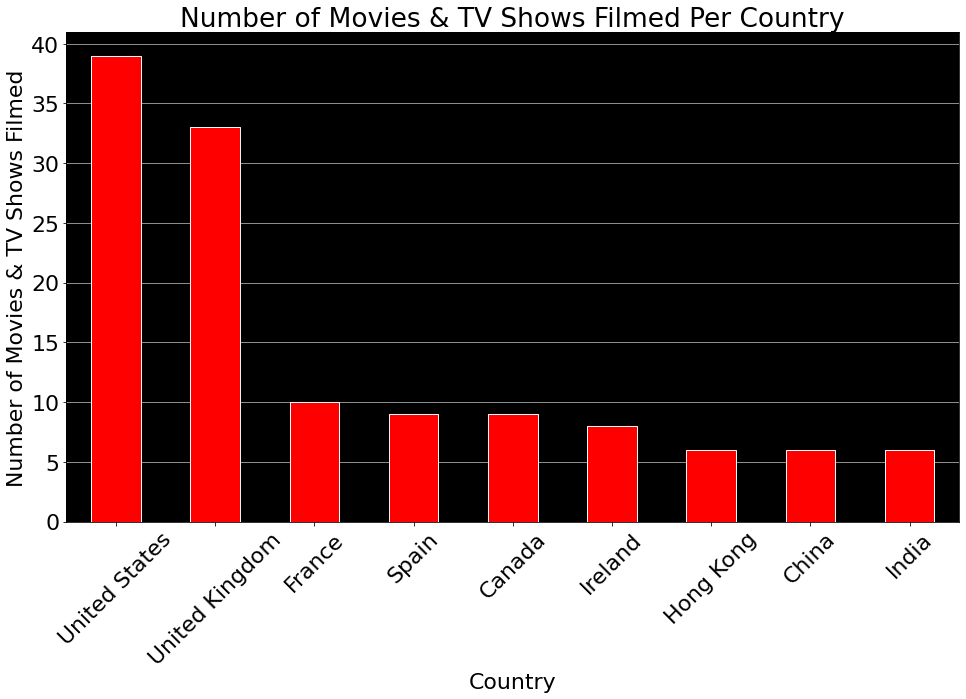

In [18]:
# OPTION FIRST

# Pull out the list of genres
country_index_list = merged_df['country'].value_counts().index.tolist()

# Pull out the value of genres
country_value_list = merged_df['country'].value_counts().tolist()

counter = 0
country_dict = {}
for countries in country_index_list:
    country = countries.split(",")[0]
    if country not in country_dict.keys():
        country_dict[country] = 0
    country_dict[country] += 1
    
key = list(country_dict.keys())
value = list(country_dict.values())
df_dict = {'countries': key,
       'values': value}
df_dict

# TESTING
# total = 0
# for (key, value) in genres_dict.items():
#     total += value
# total

countries_df = pd.DataFrame(df_dict)
renamed_countries_df = countries_df.set_index('countries')
sorted_countries_df = renamed_countries_df.sort_values(by='values', ascending=False)
top_countries_df = sorted_countries_df.loc[sorted_countries_df['values'] > 5]
top_countries_df.plot(kind='bar', figsize=(16,9), xlabel = 'Country', ylabel='Number of Movies & TV Shows Filmed', 
                      legend=None, color='red', edgecolor='snow', rot=45)
plt.grid(axis = 'y')
plt.title("Number of Movies & TV Shows Filmed Per Country")
plt.show()

## Average IMDB Rating Per Genre

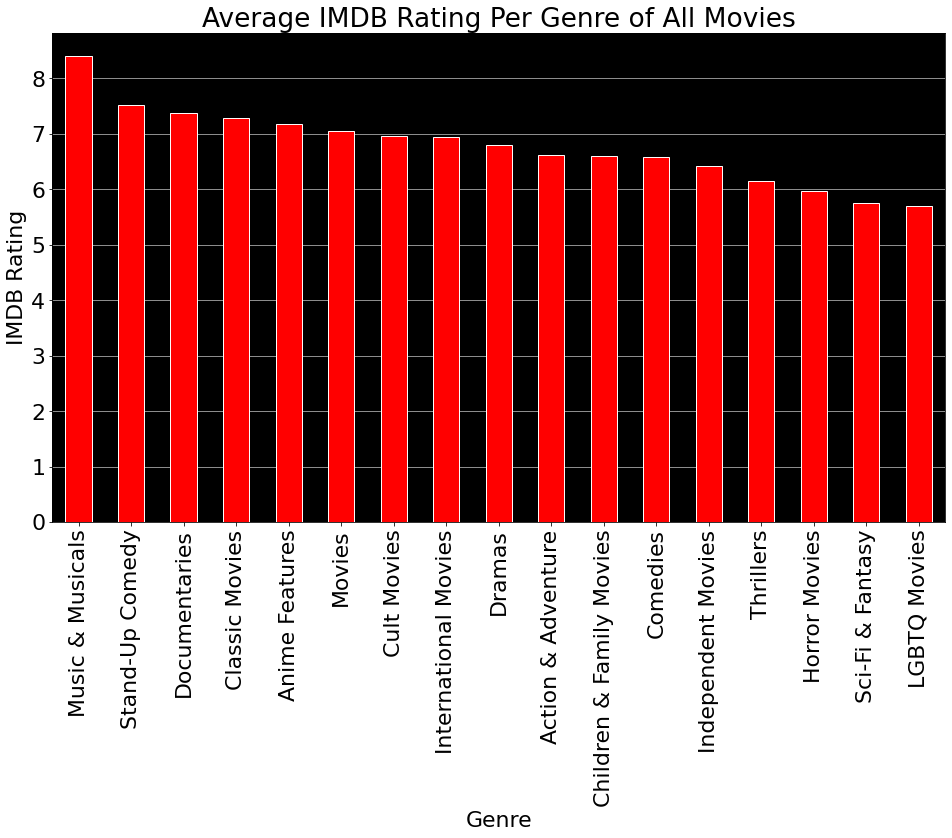

In [20]:
# MOVIES ONLY

# Plot the average rating per genre

# Select the rating and genre column
genre_rating = movie_df[["genres", "imdb_rating"]]

# Find the average rating per genres
avg_rating = genre_rating.groupby("genres").mean()

# Sort the dataframe by rating
sorted_ratings = avg_rating.sort_values('imdb_rating', ascending = False)

# Plot the rating per genre in a bar graph
sorted_ratings.plot(kind="bar", figsize=(16,9), legend=None, color='red', edgecolor='snow')
plt.xlabel("Genre")
plt.ylabel("IMDB Rating")
plt.title("Average IMDB Rating Per Genre of All Movies")
plt.grid(axis = 'y')
plt.show()

## Distribution of IMDB Rating

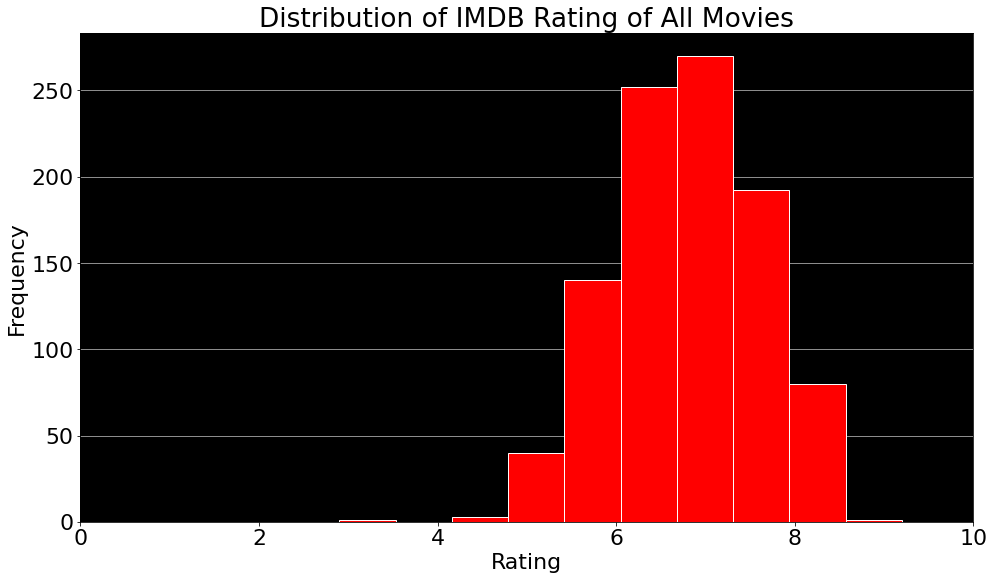

In [14]:
# MOVIES ONLY

# Plot the histogram of IMDB Rating
movie_df['imdb_rating'].plot(kind='hist', bins=10, figsize=(16,9), color='red', edgecolor='snow')
plt.xlabel("Rating")
plt.xlim((0,10))
plt.title("Distribution of IMDB Rating of All Movies")
plt.grid(axis = 'y')
plt.show()

## Number of Movies Per Genre

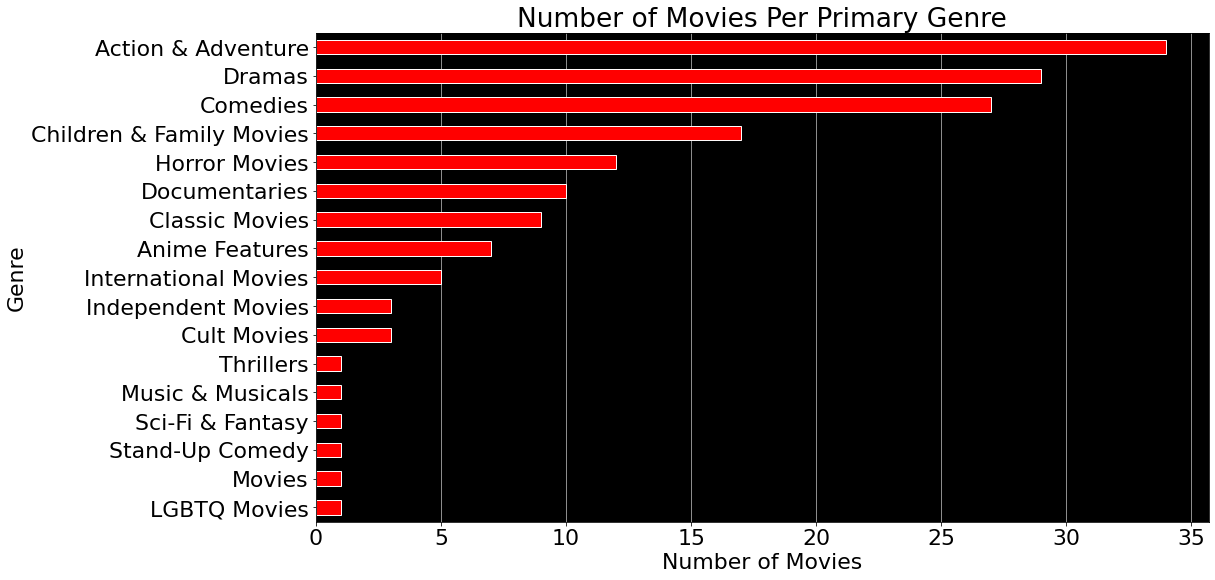

In [22]:
# Pull out the list of genres
movie_genres_index_list = movie_df['listed_in'].value_counts().index.tolist()

# Pull out the value of genres
movie_genres_value_list = movie_df['listed_in'].value_counts().tolist()

# Get the first genres in every columns and count the number of each genre
genres_dict = {}
for genres in movie_genres_index_list:
    genre = genres.split(",")[0]
    if genre not in genres_dict.keys():
        genres_dict[genre] = 0
    genres_dict[genre] += 1

# Create a dictionary of list for plotting
key = list(genres_dict.keys())
value = list(genres_dict.values())
df_dict = {'genres': key,
       'values': value}
df_dict

# # Testing for total number of counts
# total = 0
# for (key, value) in genres_dict.items():
#     total += value
# total

# Transform the collection into a dataframe and plot a horizontal bar graph
genres_df = pd.DataFrame(df_dict)
renamed_genres_df = genres_df.set_index('genres')
sorted_genres_df = renamed_genres_df.sort_values(by='values')
sorted_genres_df.plot(kind='barh', figsize=(16,9), legend=None, color='red', edgecolor='snow')
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Number of Movies Per Primary Genre")
plt.grid(axis = 'x')
plt.show()

# Supplemental Codes

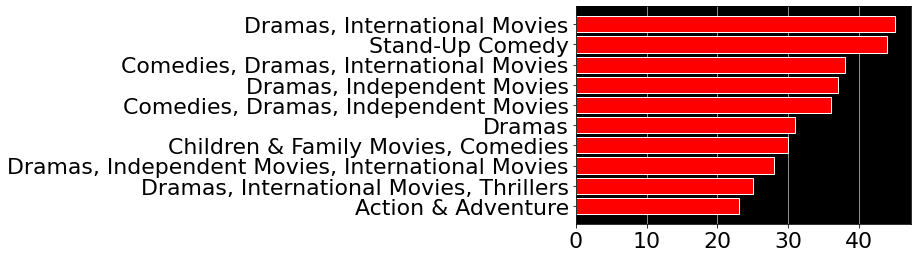

In [16]:
# LEAVE IT
# OPTION TOTAL

# Pull out the list of genres
movie_genres_index_list = movie_df['listed_in'].value_counts().index.tolist()

# Pull out the value of genres
movie_genres_value_list = movie_df['listed_in'].value_counts().tolist()

plt.barh(movie_genres_index_list[10:0:-1], movie_genres_value_list[10:0:-1], color='red', edgecolor='snow')
plt.xticks(rotation = 0)
plt.grid(axis = 'x')
plt.show()

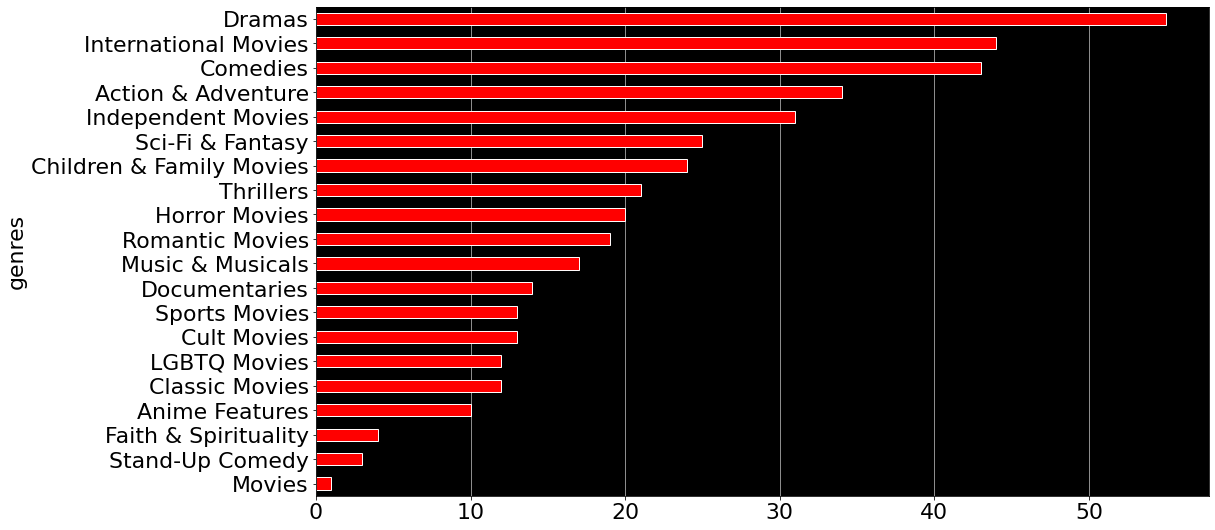

In [17]:
# LEAVE IT
# OPTION SPLIT

# Pull out the list of genres
movie_genres_index_list = movie_df['listed_in'].value_counts().index.tolist()

# Pull out the value of genres
movie_genres_value_list = movie_df['listed_in'].value_counts().tolist()


# 
counter = 0
genres_dict = {}

for genres_row in movie_genres_index_list:
    genres = genres_row.split(", ")

    for genre in genres:
        if genre not in genres_dict.keys():
            genres_dict[genre] = 0
        genres_dict[genre] += 1
    
    

key = list(genres_dict.keys())
value = list(genres_dict.values())
df_dict = {'genres': key,
       'values': value}

total = 0
for (key, value) in genres_dict.items():
    total += value
total
# counter

genres_df = pd.DataFrame(df_dict)
renamed_genres_df = genres_df.set_index('genres')
sorted_genres_df = renamed_genres_df.sort_values(by='values')
sorted_genres_df.plot(kind='barh', figsize=(16,9), legend=None, color='red', edgecolor='snow')
plt.grid(axis = 'x')
plt.show()

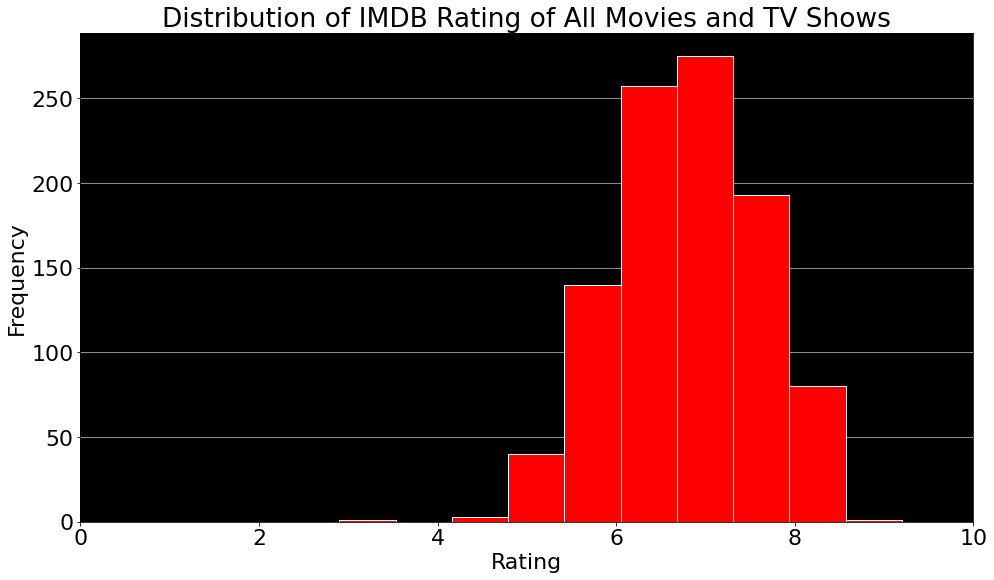

In [13]:
# Plot the histogram of IMDB Rating
merged_df['imdb_rating'].plot(kind='hist', bins=10, figsize=(16,9), color='red', edgecolor='snow')
plt.xlabel("Rating")
plt.xlim((0,10))
plt.title("Distribution of IMDB Rating of All Movies and TV Shows")
plt.grid(axis = 'y')
plt.show()

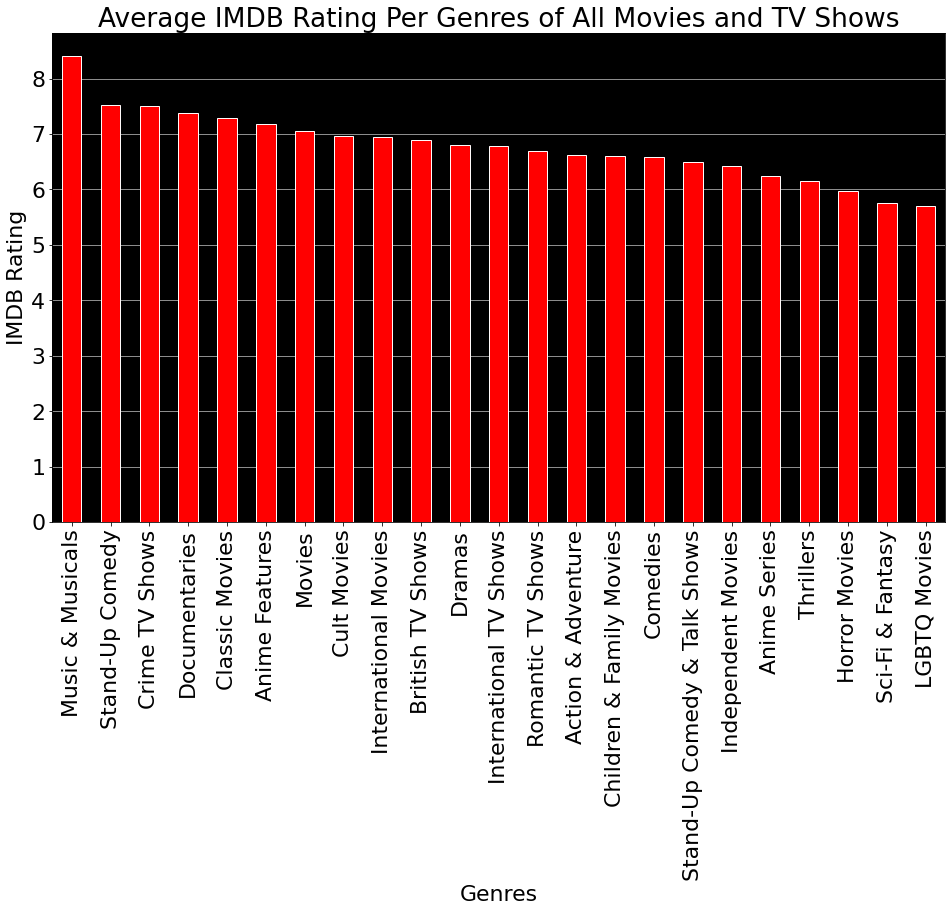

In [11]:
# Select the rating and genre column
genre_rating = merged_df[["genres", "imdb_rating"]]

# Find the average rating per genres
avg_rating = genre_rating.groupby("genres").mean()

# Sort the dataframe by rating
sorted_ratings = avg_rating.sort_values('imdb_rating', ascending = False)

# Plot the rating per genre in a bar graph
sorted_ratings.plot(kind="bar", figsize=(16,9), legend=None, color='red', edgecolor='snow')
plt.xlabel("Genres")
plt.ylabel("IMDB Rating")
plt.title("Average IMDB Rating Per Genres of All Movies and TV Shows")
plt.grid(axis = 'y')
plt.show()